<a href="https://colab.research.google.com/github/RACHEALJOE545/Health_checkup/blob/main/Nebiant_Lead_Scoring_Model_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:33563607-48ef-43d4-a61e-df6b5d7ddd69.png)

### Introduction
In this analysis, the objective is to develop a Predictive Lead Scoring model designed to prioritize leads based on their likelihood of conversion. This model aims to provide Nebiant Analytics team with actionable insights, enabling them to focus their efforts on high-value leads that are more likely to convert.

The core goal is to create a model that predicts the probability of lead conversion, classifying leads into categories such as "High", "Medium", or "Low" probability. By accurately identifying the most promising leads, the model will help optimize resource allocation and improve the efficiency of the sales process.

The impact of this analysis is significant as it allows the sales team to focus on the leads with the highest potential, ultimately increasing conversion rates and driving business growth.

### Steps Taken to Build the Model

- **Data Preprocessing**
  - Addressed missing values
  - Managed outliers
  - Checked for duplicates
  
- **Exploratory Data Analysis (EDA)**
  - Analyzed the data to uncover and understand patterns

- **Feature Engineering**
   - Encoded categorical features
   - Created a Time-to-Start column
   - Analyzed the sentiment of texts, then created Sentiment Category and Sentiment Score columns
   - Applied TF-IDF to convert text data into numerical features
   - Used K-Means clustering to group similar texts and added the resulting cluster labels as a new feature

- **Model Training**
   - Selected label and feature variables
   - Applied Supervised Learning: Trained classifiers (Logistic Regression, Random Forest, Decision Tree) using the engineered features
   - Hyperparameter Tuning: Optimized model parameters using GridSearchCV or RandomizedSearchCV

- **Model Evaluation**
   - Performed Train-Test Split: Split the dataset into training and testing sets
   - Calculated model accuracy on both training and testing data
   - Assessed model performance using metrics such as accuracy, precision, recall, and F1-score
   
- **Predictive Scoring for All Classes**
Generated predictive scores for each sentiment class

- **Feature Importance Analysis**
Used SHAP (Shapley Additive Explanations) to assess feature importance

- **Conclusion and Observations**
Summarized key findings and noted areas for improvement

In [ ]:
Feature_scaled.sample(10)

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start,Lead_Score,Rank,conversion_category
577,-0.131551,0.776965,0.353556,0.042328,0.792049,-0.104408,-0.873614,-0.702942,0.0,372.5,Low
366,-0.131551,0.776965,0.353556,-0.676073,-0.104140,-0.104408,0.209100,-0.668776,0.0,372.5,Low
355,-0.131551,0.776965,0.353556,-0.676073,-0.104140,0.766536,1.291814,-0.668776,76.0,17.5,Medium
606,-0.131551,0.776965,0.353556,2.197531,0.792049,-0.104408,-0.873614,0.322030,1.0,90.5,Low
153,-1.771916,0.776965,2.481855,-0.676073,-0.104140,-0.104408,0.209100,-0.429616,0.0,372.5,Low
141,-1.771916,-1.287059,-2.838894,-0.676073,-0.104140,-0.104408,1.291814,-0.429616,0.0,372.5,Low
500,-0.131551,-1.287059,0.353556,0.042328,0.792049,-0.104408,1.291814,-0.805439,0.0,372.5,Low
28,1.508813,-1.287059,0.353556,-0.676073,-0.104140,-0.104408,1.291814,-0.429616,0.0,372.5,Low
426,-0.131551,-1.287059,0.353556,0.042328,0.792049,-0.104408,-0.873614,-0.327119,0.0,372.5,Low
475,-0.131551,0.776965,0.353556,-0.676073,0.792049,-0.104408,-0.873614,0.390362,0.0,372.5,Low


In [ ]:
# Importing Libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data file into python
data = pd.read_excel("Nebiant Analytics Lead Generation Dataset - For Dashboard.xlsx")

In [ ]:
data2 = data.copy(deep =True)

In [ ]:
data.head(20)

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback
0,Data Science,14/07/2024 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,09/07/2024,Danjuma,Send WA message,Not Provided
1,Data Science,14/07/2024 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,08/03/2024,Danjuma,Interested in the da path,Follow Up
2,Data Science,14/07/2024 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay
3,Data Science,14/07/2024 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,08/03/2024,Danjuma,"Should check back before the end of today, int...",Follow Up
4,Data Science,14/07/2024 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,08/03/2024,Danjuma,"Checking the brochure and registration link, t...",Follow Up
5,Data Science,14/07/2024 18:14:30,aakayiri@yahoo.com,Alex Akayiri,233249738667,Male,Ghana,Linkedin,09/07/2024,Danjuma,"Called on WA, N/A, dropped a mesage to call back",Sent WhatsApp
6,Data Science,14/07/2024 18:14:33,njiruperminus@gmail.com,Kaburungo Jnr,254706801745,Male,Kenya,Facebook,08/03/2024,Danjuma,"Contact not available on WA, foreign number",Not Provided
7,Data Science,14/07/2024 18:15:18,bismarklartey1@gmail.com,Bismark Lartey,233247838468,Male,Ghana,Facebook,08/03/2024,Danjuma,"Called on WA, N/A, dropped a mesage to call back",Sent WhatsApp
8,Data Science,14/07/2024 18:15:56,davelutta@gmail.com,David Lutta,725452200,Male,Kenya,Facebook,09/07/2024,Danjuma,At 5pm kenya time,Sent WhatsApp
9,Data Science,14/07/2024 18:16:10,mailsampson89@gmail.com,Ndiana-Abasi Sampson,8127927492,Female,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Program              688 non-null    object
 1   Timestamp            688 non-null    object
 2   Email Address        687 non-null    object
 3   Name                 688 non-null    object
 4   Phone Number         688 non-null    object
 5   Gender               688 non-null    object
 6   Location (Country)   688 non-null    object
 7   Lead Source          688 non-null    object
 8   Training Start Date  688 non-null    object
 9   Lead Manager         688 non-null    object
 10  Comments             688 non-null    object
 11  Feedback             687 non-null    object
dtypes: object(12)
memory usage: 64.6+ KB


###### There are 688 records in this dataset with several missing values

In [ ]:
# To convert date Features into datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], dayfirst=True)

data['Training Start Date'] = pd.to_datetime(data['Training Start Date'], dayfirst=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Program              688 non-null    object        
 1   Timestamp            688 non-null    datetime64[ns]
 2   Email Address        687 non-null    object        
 3   Name                 688 non-null    object        
 4   Phone Number         688 non-null    object        
 5   Gender               688 non-null    object        
 6   Location (Country)   688 non-null    object        
 7   Lead Source          688 non-null    object        
 8   Training Start Date  688 non-null    datetime64[ns]
 9   Lead Manager         688 non-null    object        
 10  Comments             688 non-null    object        
 11  Feedback             687 non-null    object        
dtypes: datetime64[ns](2), object(10)
memory usage: 64.6+ KB


In [ ]:
data.describe(include = ("all"))

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback
count,688,688,687,688,688,688,688,688,688,688,688,687
unique,3,NaN,619,614,684,3,12,6,NaN,4,188,8
top,Data Analytics,NaN,ifeoluwagideon@gmail.com,Afees Adelaja,233207447447,Male,Nigeria,Facebook,NaN,Unassigned,Not provided,Not Provided
freq,406,NaN,3,4,2,418,520,390,NaN,401,392,432
mean,NaN,2024-08-10 13:18:49.779069952,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-06 16:55:06.976744192,NaN,NaN,NaN
min,NaN,2024-02-10 20:13:10,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN
25%,NaN,2024-07-14 18:54:19,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-03 00:00:00,NaN,NaN,NaN
50%,NaN,2024-07-22 21:08:41,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-07 00:00:00,NaN,NaN,NaN
75%,NaN,2024-08-29 21:42:31.249999872,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 00:00:00,NaN,NaN,NaN
max,NaN,2024-12-09 22:00:55,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-05 00:00:00,NaN,NaN,NaN


###### The data contains 688 records with 12 features comprising of categorical data, datetime and text

In [ ]:
# to check for missing values
data.isnull().sum()

Program                0
Timestamp              0
Email Address          1
Name                   0
Phone Number           0
Gender                 0
Location (Country)     0
Lead Source            0
Training Start Date    0
Lead Manager           0
Comments               0
Feedback               1
dtype: int64

#### Handling missing data

In [ ]:
# Missing values in the Feedback column will be filled with "No Feedback"
data["Feedback"] = data["Feedback"].fillna("No Feedback")
data["Feedback"].isnull().sum()

0

In [ ]:
# Missing values in the Email Address column will be filled with "No Email Address"
data["Email Address"] = data["Email Address"].fillna("No Email Address")
data["Email Address"].isnull().sum()

0

In [ ]:
#To check for duplicate records
data.duplicated().sum()

0

In [ ]:
data.shape

(688, 12)

###### The data now contains 12 features and 688 records

### Check for Outliers

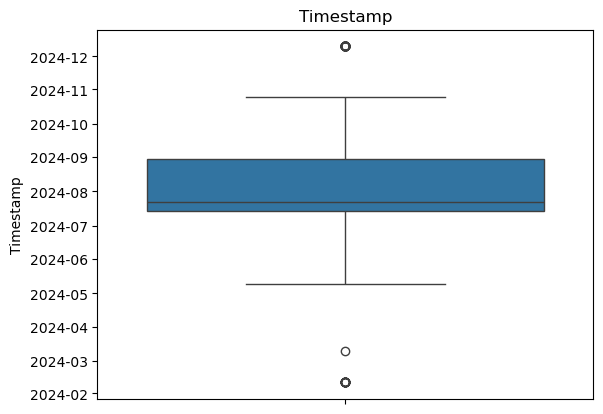

In [ ]:
sns.boxplot(data['Timestamp'])
plt.title("Timestamp")
plt.show()

In [ ]:
Q1 = data["Timestamp"].quantile(0.25)
Q3 = data["Timestamp"].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data["Timestamp"] >= lower_bound) & (data["Timestamp"] <= upper_bound)]

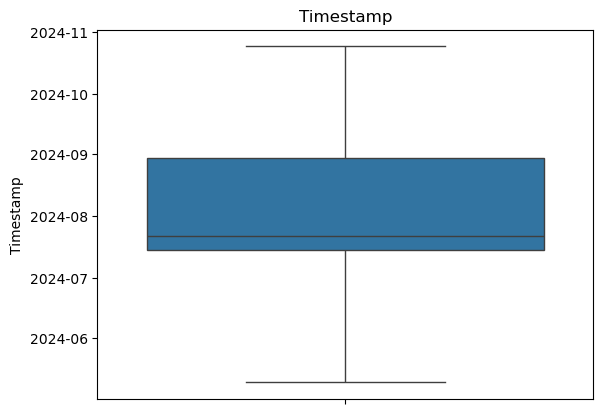

In [ ]:
sns.boxplot(data['Timestamp'])
plt.title("Timestamp")
plt.show()

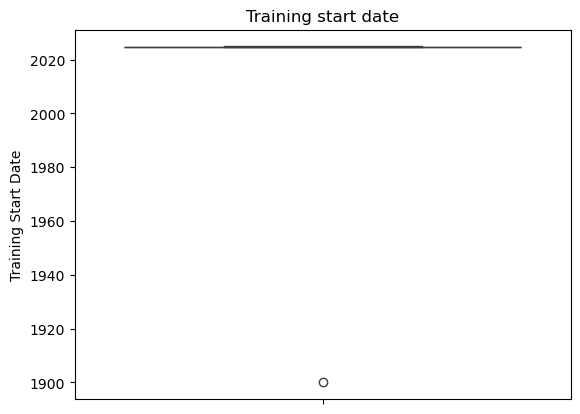

In [ ]:
sns.boxplot(data['Training Start Date'])
plt.title("Training start date")
plt.show()

**The box plot reveals a record from the year 1900, which is an outlier. As a result, it will be removed.**

In [ ]:
data = data[data["Training Start Date"] > data["Training Start Date"].min()]

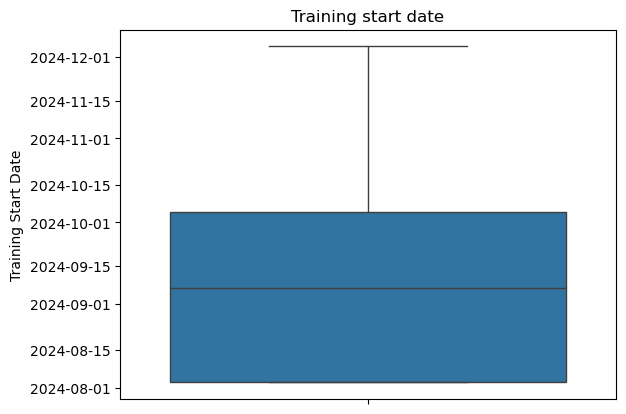

In [ ]:
sns.boxplot(data['Training Start Date'])
plt.title("Training start date")
plt.show()

### Univariate Analysis

In [ ]:
data.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback
0,Data Science,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,2024-09-07,Danjuma,Send WA message,Not Provided
1,Data Science,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,2024-08-03,Danjuma,Interested in the da path,Follow Up
2,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,2024-08-03,Danjuma,Can't afford the price,Can't Pay
3,Data Science,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,2024-08-03,Danjuma,"Should check back before the end of today, int...",Follow Up
4,Data Science,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,2024-08-03,Danjuma,"Checking the brochure and registration link, t...",Follow Up


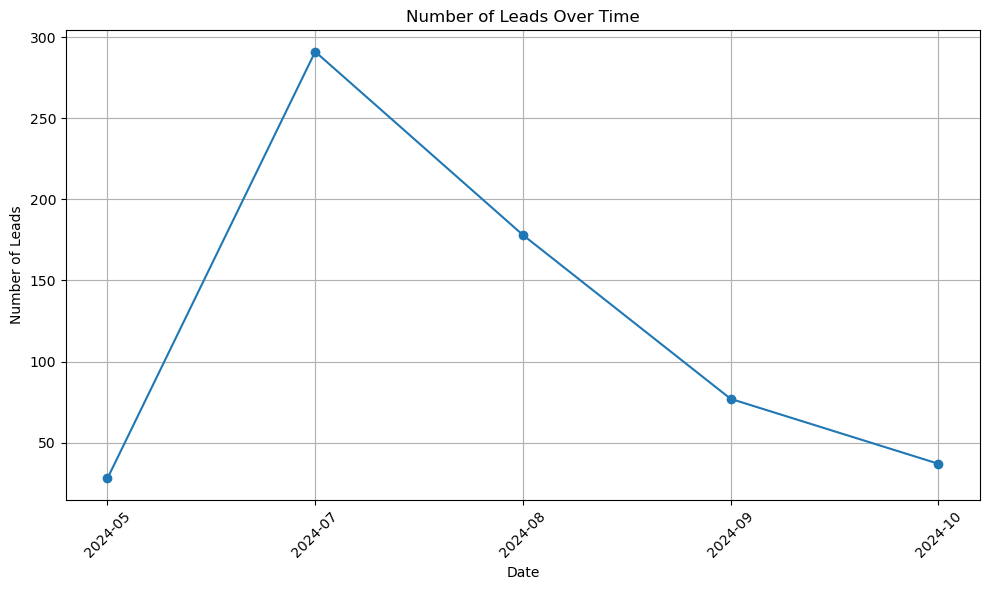

In [ ]:
# Group by month and get the count of leads
data['Date'] = data['Timestamp'].dt.to_period('M')  # Convert to Period for grouping by month
program_leads = data.groupby(['Date']).size().reset_index(name='Lead Count')

# Convert Period to string for plotting
program_leads['Date'] = program_leads['Date'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(program_leads["Date"], program_leads["Lead Count"], marker='o', label='Lead Count')

plt.title('Number of Leads Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

- The data contains leads generated from May 2024 to October 2024
- The number of leads showed an exponential increase in July 2024, reaching almost 300. However, the trend has since declined significantly over the following months.

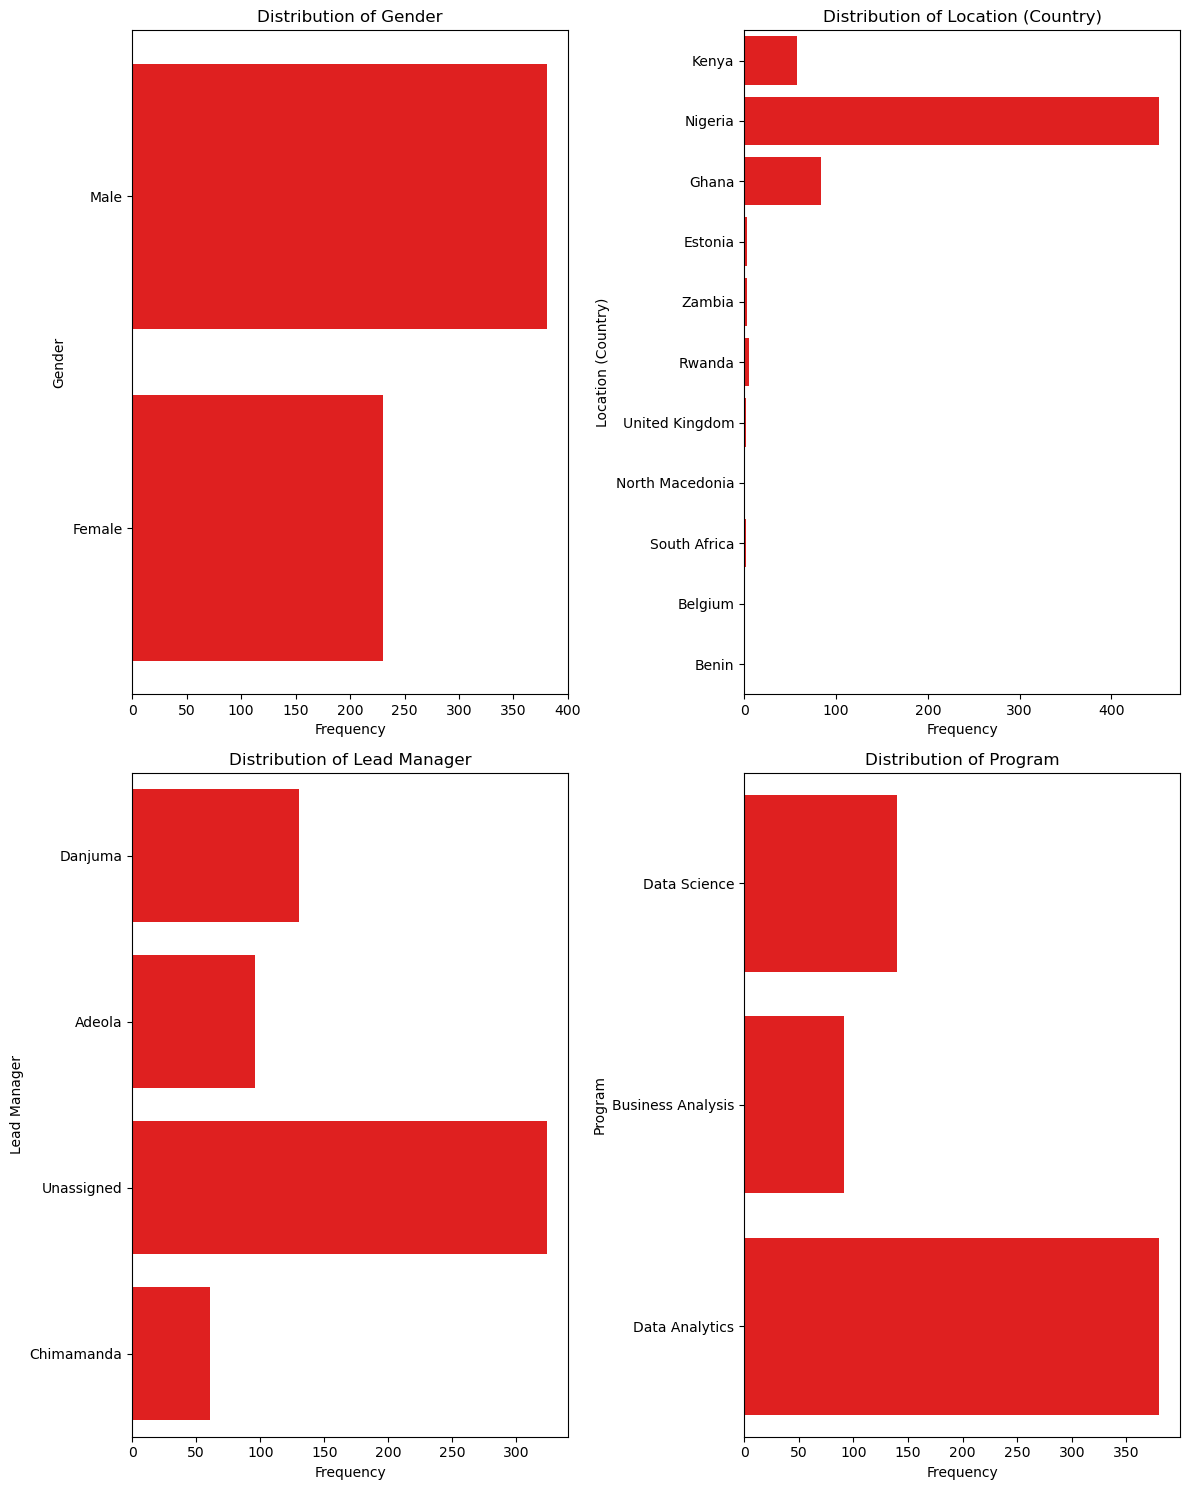

In [ ]:
columns = data[["Gender", "Location (Country)", "Lead Manager", "Program"]]
# To create a subplot for visualizing multiple columns in the dataset.
fig, axes = plt.subplots(ncols = 2, nrows= 2, figsize = (12,15))
ax = axes.flatten()

for index, column in enumerate (columns):
    sns.countplot(data[column], color = "red", ax = ax[index])
    ax[index].set(title = (f"Distribution of {column}"), ylabel = column, xlabel = "Frequency")
plt.tight_layout()
plt.show()

#### From this analysis, we can tell that:
- The majority of individuals in our data are Male with a count of above 400
- Most of the intended students do not have a lead manager assigned to them.
- The majority of intended students are from Nigeria, followed by Ghana and Kenya, with a smaller number from other countries.
- Data Analytics is the program with the highest enrollment intention among prospective students, followed by Data Science, which has approximately half as many enrollees. Business Analytics is the least popular choice.

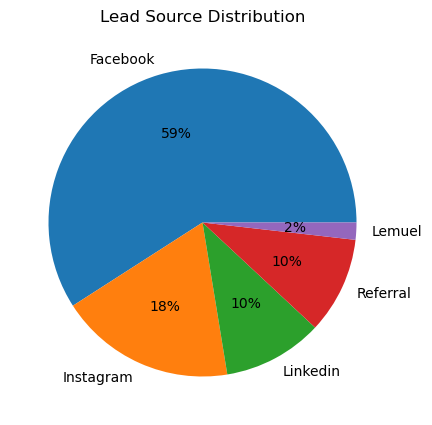

In [ ]:
lead_score_counts = data["Lead Source"].value_counts()
plt.figure(figsize = (20,5))

plt.pie(lead_score_counts, labels = lead_score_counts.index, autopct = "%1.0f%%")
plt.title("Lead Source Distribution")

plt.show()

- The lead source that brings in the most prospect is Facebook.

### Bivariate Analysis

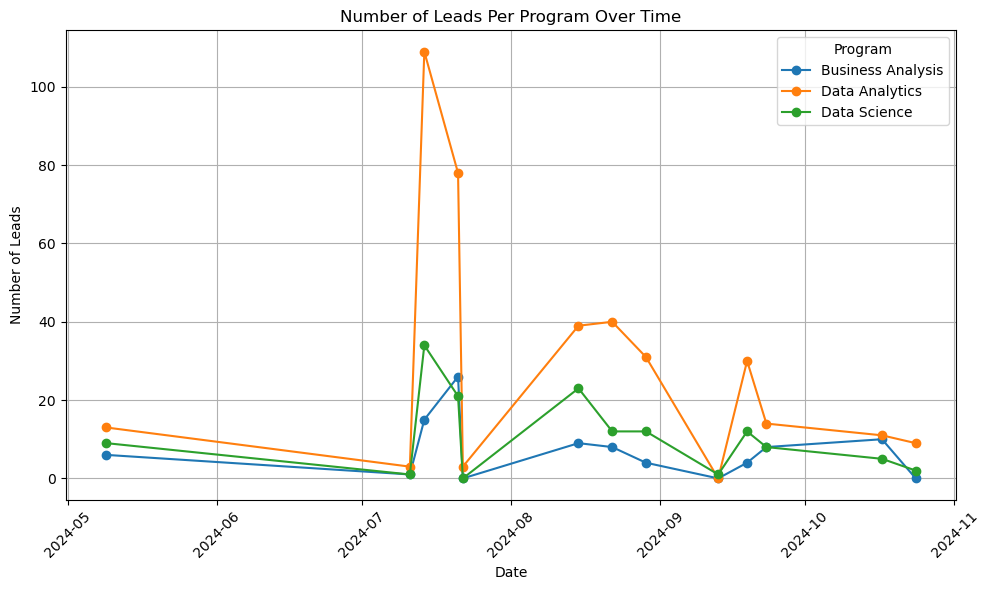

In [ ]:
# Group by date and program to get the count of leads
data['Date'] = data['Timestamp'].dt.date
program_leads = data.groupby(['Date', 'Program']).size().reset_index(name='Lead Count')

# Pivot the data for easier plotting
pivot_data = program_leads.pivot(index='Date', columns='Program', values='Lead Count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
for Program in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[Program], marker='o', label=Program)

plt.title('Number of Leads Per Program Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.legend(title='Program')
plt.grid()
plt.tight_layout()
plt.show()

**Most leads who were generate were interested in the Data Analytics Program**

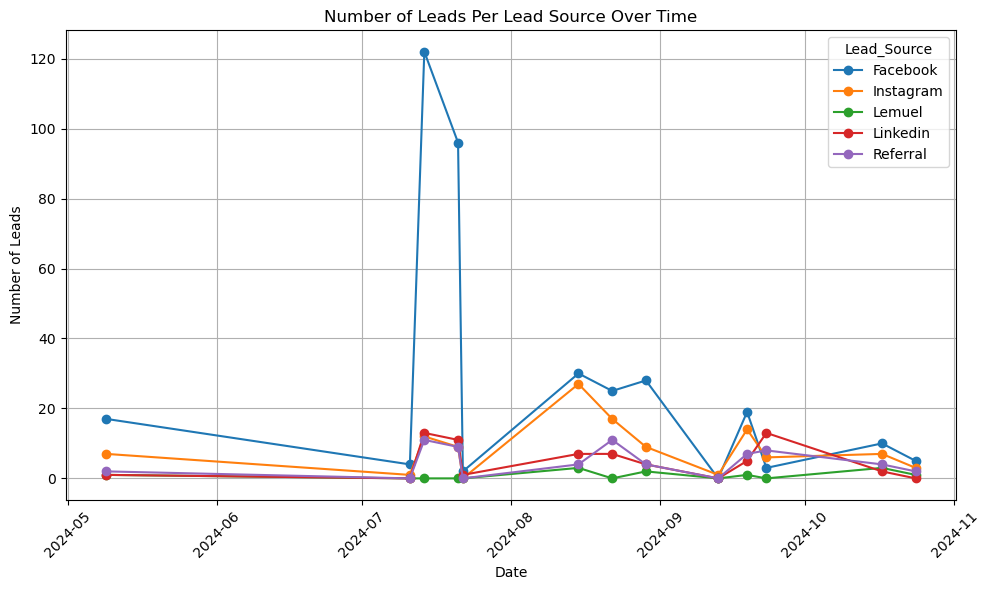

In [ ]:
# Group by date and program to get the count of leads
data['Date'] = data['Timestamp'].dt.date
program_leads = data.groupby(['Date', 'Lead Source']).size().reset_index(name='Lead Count')

# Pivot the data for easier plotting
pivot_data = program_leads.pivot(index='Date', columns='Lead Source', values='Lead Count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
for Lead_Source in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[Lead_Source], marker='o', label=Lead_Source)

plt.title('Number of Leads Per Lead Source Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.legend(title='Lead_Source')
plt.grid()
plt.tight_layout()
plt.show()

**Facebook, through the months, has  always generate the highest leads**

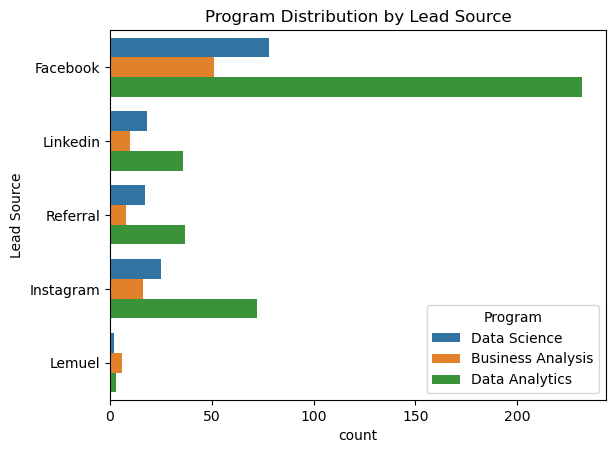

In [ ]:
sns.countplot(data = data, y="Lead Source", hue = "Program")
plt.title("Program Distribution by Lead Source")
plt.show()

- The majority of Facebook prospects expressed interest in Data Analytics, with Business Analytics being the least popular.
- All other lead sources follow a similar pattern, except for "Lemuel Yole Odior," where her audience shows more interest in the Business Analytics program, followed by Data Analytics, and then Data Science.

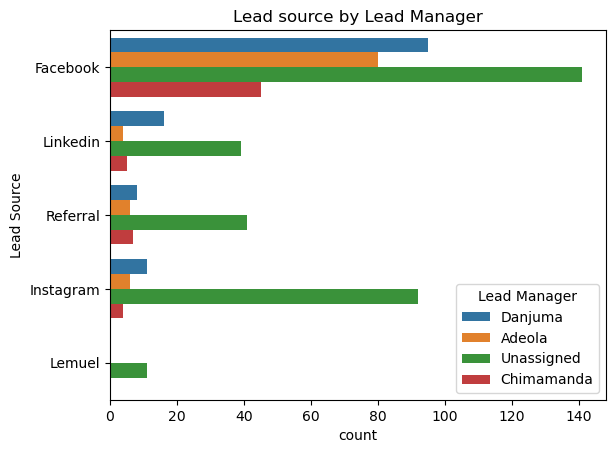

In [ ]:
sns.countplot(data = data, y="Lead Source", hue = "Lead Manager")
plt.title("Lead source by Lead Manager")
plt.show()

Most prospects in this dataset are not assigned managers

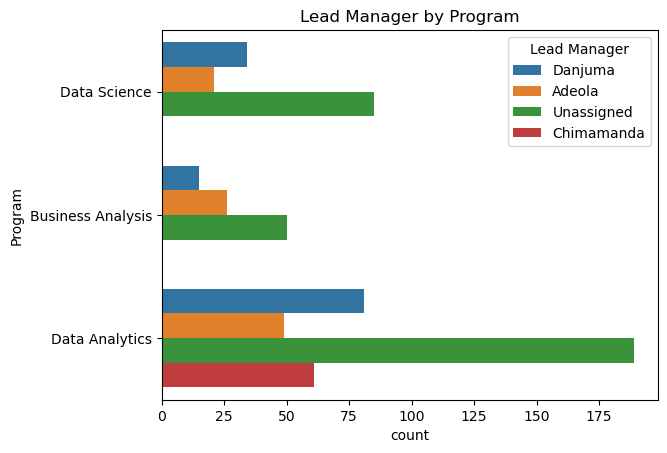

In [ ]:
sns.countplot(data = data, y="Program", hue = "Lead Manager")
plt.title("Lead Manager by Program")
plt.show()

## Feature Engineering
1. **Encode Features to transform them into numerical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# initialize the encoder
encoder = LabelEncoder()

In [ ]:
data.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback,Date
0,Data Science,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,2024-09-07,Danjuma,Send WA message,Not Provided,2024-07-14
1,Data Science,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,2024-08-03,Danjuma,Interested in the da path,Follow Up,2024-07-14
2,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,2024-08-03,Danjuma,Can't afford the price,Can't Pay,2024-07-14
3,Data Science,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,2024-08-03,Danjuma,"Should check back before the end of today, int...",Follow Up,2024-07-14
4,Data Science,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,2024-08-03,Danjuma,"Checking the brochure and registration link, t...",Follow Up,2024-07-14


In [ ]:
data = data.rename(columns ={"Location (Country)" : "Location" } )

In [ ]:
Categorical_col = data[["Gender", "Location", "Lead Source", "Lead Manager", "Program"]]

for column_name in Categorical_col.columns:
    data[column_name] = encoder.fit_transform(data[column_name])

# data[Categorical_col.columns] = Categorical_col.apply(encoder.fit_transform)

In [ ]:
data.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location,Lead Source,Training Start Date,Lead Manager,Comments,Feedback,Date
0,2,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,1,4,0,2024-09-07,2,Send WA message,Not Provided,2024-07-14
1,2,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,1,5,0,2024-08-03,2,Interested in the da path,Follow Up,2024-07-14
2,2,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,1,5,0,2024-08-03,2,Can't afford the price,Can't Pay,2024-07-14
3,2,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,1,3,0,2024-08-03,2,"Should check back before the end of today, int...",Follow Up,2024-07-14
4,2,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,1,4,0,2024-08-03,2,"Checking the brochure and registration link, t...",Follow Up,2024-07-14


2. **Transform "Comments/Feedback" into sentiment scores**

In [ ]:
# Merge comments and feedback into a single feature
data['merged_text'] = data['Comments'] + ' ' + data['Feedback']

In [ ]:
data.drop(columns = ['Comments','Feedback'], axis = 1, inplace = True)

In [ ]:
data.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location,Lead Source,Training Start Date,Lead Manager,Date,merged_text
0,2,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,1,4,0,2024-09-07,2,2024-07-14,Send WA message Not Provided
1,2,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,1,5,0,2024-08-03,2,2024-07-14,Interested in the da path Follow Up
2,2,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,1,5,0,2024-08-03,2,2024-07-14,Can't afford the price Can't Pay
3,2,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,1,3,0,2024-08-03,2,2024-07-14,"Should check back before the end of today, int..."
4,2,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,1,4,0,2024-08-03,2,2024-07-14,"Checking the brochure and registration link, t..."


## Preprocess Text

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import re

def clean_text_for_sentiment(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)

    # Remove @mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Preserve punctuation useful for sentiment (!, ?, :) etc.)
    text = re.sub(r"[^\w\s!?.,:;()'-]", '', text)

    # Convert to lowercase for consistency
    text = text.lower()

    # Remove extra spaces
    text = ' '.join(text.split())

    # Tokenize into sentences
    sentences = nltk.sent_tokenize(text)

    sentences = ' '.join(sentences)

    return sentences

In [ ]:
data['merged_text'] = data['merged_text'].fillna("").astype(str)
data['merged_text'] = data['merged_text'].apply(lambda x: clean_text_for_sentiment(x))

In [ ]:
def handle_negation(text):
    negation_patterns = ['can\'t', 'cannot', 'don\'t', 'won\'t', 'isn\'t', 'aren\'t']
    for pattern in negation_patterns:
        text = text.replace(pattern, 'not')  # Make "can't" into "not" to emphasize negation
    return text

In [ ]:
data['merged_text'] = data['merged_text'].apply(lambda x: handle_negation(x))

In [ ]:
#Importing libraries
from textblob import TextBlob

# Function to enhance negative context for sentiment analysis
def enhance_negative_context(text):
    negative_keywords = ['not afford', 'not pay', 'unable to pay', 'not affordable']

    # Check if any negative keywords are present in the text
    for word in negative_keywords:
        if word in text.lower():
            return 'Negative'  # Boost sentiment to 'Negative' if keywords are found

    # If no negative keywords are found, use TextBlob's sentiment polarity
    blob = TextBlob(text)
    score = blob.sentiment.polarity

    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis with enhanced negative context
data['Sentiment'] = data['merged_text'].apply(lambda x: enhance_negative_context(x))

# Optional: If you want to store the raw sentiment polarity scores, you can use this
data["comment Score"] = data['merged_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
data.head(25)

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location,Lead Source,Training Start Date,Lead Manager,Date,merged_text,Sentiment,comment Score
0,2,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,1,4,0,2024-09-07,2,2024-07-14,send wa message not provided,Neutral,0.0000
1,2,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,1,5,0,2024-08-03,2,2024-07-14,interested in the da path follow up,Positive,0.2500
2,2,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,1,5,0,2024-08-03,2,2024-07-14,not afford the price not pay,Negative,0.0000
3,2,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,1,3,0,2024-08-03,2,2024-07-14,"should check back before the end of today, int...",Positive,0.1250
4,2,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,1,4,0,2024-08-03,2,2024-07-14,"checking the brochure and registration link, t...",Neutral,0.0000
5,2,2024-07-14 18:14:30,aakayiri@yahoo.com,Alex Akayiri,233249738667,1,3,3,2024-09-07,2,2024-07-14,"called on wa, na, dropped a mesage to call bac...",Neutral,0.0000
6,2,2024-07-14 18:14:33,njiruperminus@gmail.com,Kaburungo Jnr,254706801745,1,4,0,2024-08-03,2,2024-07-14,"contact not available on wa, foreign number no...",Negative,-0.1625
7,2,2024-07-14 18:15:18,bismarklartey1@gmail.com,Bismark Lartey,233247838468,1,3,0,2024-08-03,2,2024-07-14,"called on wa, na, dropped a mesage to call bac...",Neutral,0.0000
8,2,2024-07-14 18:15:56,davelutta@gmail.com,David Lutta,725452200,1,4,0,2024-09-07,2,2024-07-14,at 5pm kenya time sent whatsapp,Neutral,0.0000
9,2,2024-07-14 18:16:10,mailsampson89@gmail.com,Ndiana-Abasi Sampson,8127927492,0,5,0,2024-08-03,2,2024-07-14,not afford the price not pay,Negative,0.0000


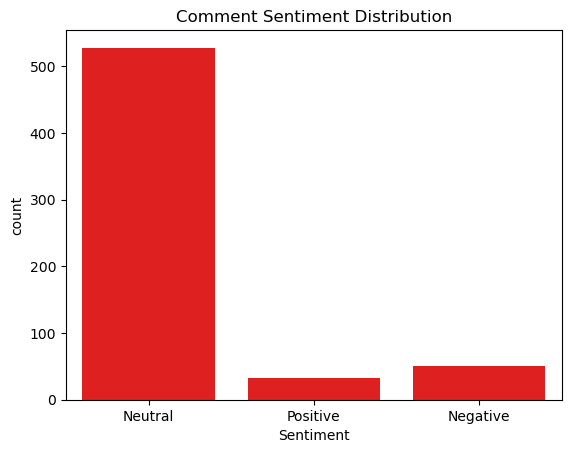

In [ ]:
sns.countplot(data = data, x = "Sentiment", color = "red")
plt.title("Comment Sentiment Distribution")
plt.show()

In [ ]:
data['Sentiment'].value_counts()

Sentiment
Neutral     528
Negative     51
Positive     32
Name: count, dtype: int64

In [ ]:
### Creating word clouds to show the frequency of words that denotes conversion

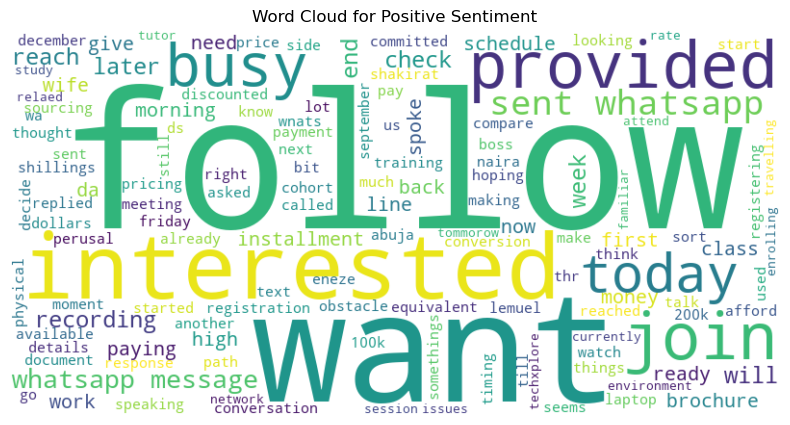

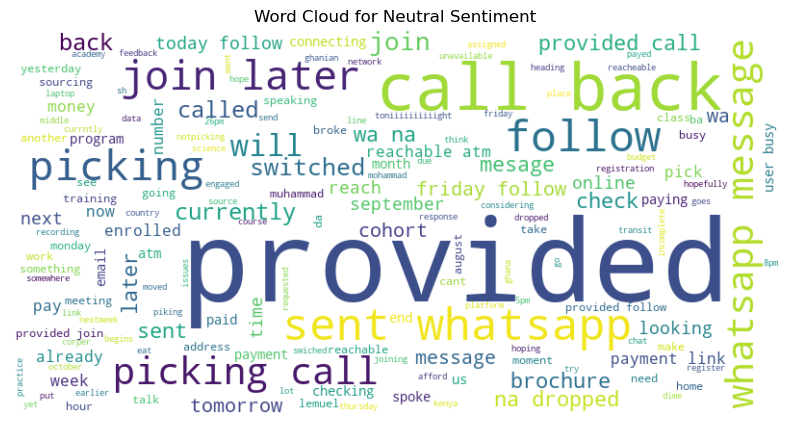

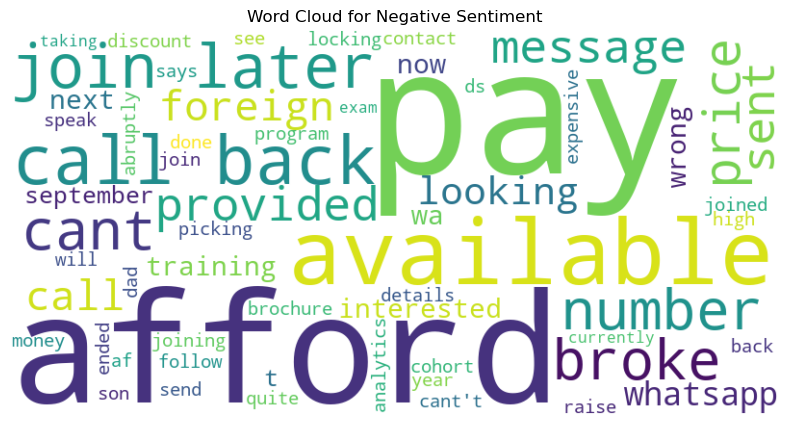

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
def generate_word_cloud(sentiment):
    text = " ".join(data[data['Sentiment'] == sentiment]['merged_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

# Generate word clouds for Positive, Neutral, and Negative
for sentiment in ['Positive', 'Neutral', 'Negative']:
    generate_word_cloud(sentiment)


#### Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Ensure all values in 'merged_text' column are strings and handle any missing values
data['merged_text'] = data['merged_text'].fillna("").astype(str)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['merged_text'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Function to extract top words for each cluster
def get_top_keywords(n_terms):
    terms = vectorizer.get_feature_names_out()
    top_keywords = {}
    for i in range(kmeans.n_clusters):
        centroid_terms = kmeans.cluster_centers_[i].argsort()[-n_terms:][::-1]
        top_keywords[f"Cluster {i}"] = [terms[ind] for ind in centroid_terms]
    return pd.DataFrame(top_keywords)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, data['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.52


Silhouette 0.52, Indicates moderate clustering. The clusters are reasonably well-defined but might have some overlap or noise.

3. **Create time to start column**

In [ ]:
# To create the "time to start", column
data['Time_to_Start'] = (data['Training Start Date'] - data['Timestamp']).dt.days

In [ ]:
data.head(20)

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location,Lead Source,Training Start Date,Lead Manager,Date,merged_text,Sentiment,comment Score,Cluster,Time_to_Start
0,2,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,1,4,0,2024-09-07,2,2024-07-14,send wa message not provided,Neutral,0.0000,2,54
1,2,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,1,5,0,2024-08-03,2,2024-07-14,interested in the da path follow up,Positive,0.2500,2,19
2,2,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,1,5,0,2024-08-03,2,2024-07-14,not afford the price not pay,Negative,0.0000,2,19
3,2,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,1,3,0,2024-08-03,2,2024-07-14,"should check back before the end of today, int...",Positive,0.1250,2,19
4,2,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,1,4,0,2024-08-03,2,2024-07-14,"checking the brochure and registration link, t...",Neutral,0.0000,2,19
5,2,2024-07-14 18:14:30,aakayiri@yahoo.com,Alex Akayiri,233249738667,1,3,3,2024-09-07,2,2024-07-14,"called on wa, na, dropped a mesage to call bac...",Neutral,0.0000,1,54
6,2,2024-07-14 18:14:33,njiruperminus@gmail.com,Kaburungo Jnr,254706801745,1,4,0,2024-08-03,2,2024-07-14,"contact not available on wa, foreign number no...",Negative,-0.1625,2,19
7,2,2024-07-14 18:15:18,bismarklartey1@gmail.com,Bismark Lartey,233247838468,1,3,0,2024-08-03,2,2024-07-14,"called on wa, na, dropped a mesage to call bac...",Neutral,0.0000,1,19
8,2,2024-07-14 18:15:56,davelutta@gmail.com,David Lutta,725452200,1,4,0,2024-09-07,2,2024-07-14,at 5pm kenya time sent whatsapp,Neutral,0.0000,1,54
9,2,2024-07-14 18:16:10,mailsampson89@gmail.com,Ndiana-Abasi Sampson,8127927492,0,5,0,2024-08-03,2,2024-07-14,not afford the price not pay,Negative,0.0000,2,19


# Model Development

In [ ]:
Label = data["Sentiment"]

In [ ]:
Features = data.drop(columns = [
    "Timestamp", "Email Address", "Name", "Phone Number", "Sentiment", "Training Start Date", "Date","merged_text"
], axis = 1)

In [ ]:
Features

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start
0,2,1,4,0,2,0.000,2,54
1,2,1,5,0,2,0.250,2,19
2,2,1,5,0,2,0.000,2,19
3,2,1,3,0,2,0.125,2,19
4,2,1,4,0,2,0.000,2,19
...,...,...,...,...,...,...,...,...
683,1,1,5,4,3,0.000,0,41
684,1,0,5,1,3,0.000,0,41
685,1,1,5,0,3,0.000,0,146
686,1,0,5,0,3,0.000,0,113


In [ ]:
Label.value_counts()

Sentiment
Neutral     528
Negative     51
Positive     32
Name: count, dtype: int64

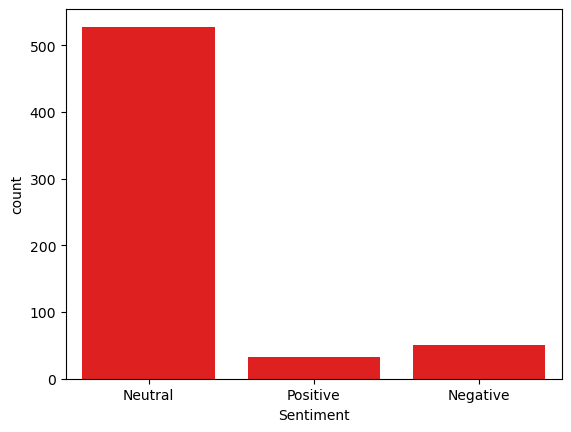

In [ ]:
sns.countplot(x = Label, color = "red")
plt.show()

### The data class is not evenly distributed

In [ ]:
label = encoder.fit_transform(Label)

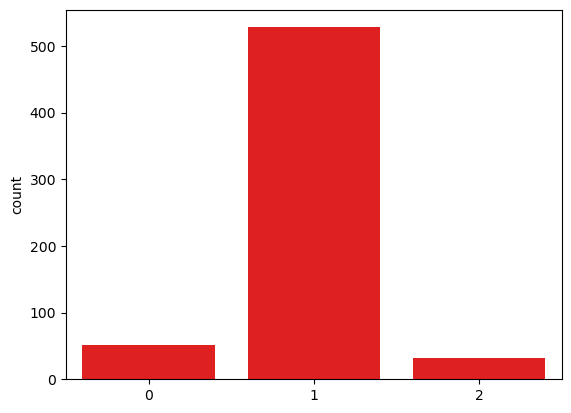

In [ ]:
sns.countplot(x = label, color = "red")
plt.show()

## Oversampling the data to address the class imbalance

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply the Random Oversampling
X_resampled, y_resampled = ros.fit_resample(Features, label)

In [ ]:
print("Features before oversampling:", len(Features))
print("Features after oversampling:", len(X_resampled))

Features before oversampling: 611
Features after oversampling: 1584


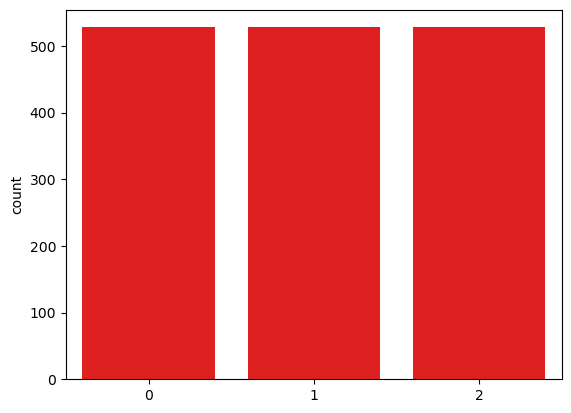

In [ ]:
sns.countplot(x = y_resampled, color = "red")
plt.show()

### Split the data
Here, the "Feature" and "Label" are split into "Train" and "Test" Data <br>
The train data will contain 80% of the data while the test data contains 20%
- Train Set: Used to train the model. The model learns patterns and relationships from this data.
- Test Set: Mimics new, unseen data that the model will encounter in real-world applications. This ensures the model's performance isn't overly optimistic or biased toward the training data.

In [ ]:
# train_test_split use to split the data
from sklearn.model_selection import train_test_split

In [ ]:
# Features : X - variables
# Label = y- Variables
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [ ]:
len(Xtrain)

1267

In [ ]:
Xtrain.shape

(1267, 8)

In [ ]:
len(Xtest)

317

In [ ]:
Xtest.head(20)

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start
468,1,1,5,0,3,0.000000,2,15
332,1,1,3,0,0,0.000000,0,19
1434,1,1,5,0,1,0.250000,2,19
380,1,1,5,0,2,0.000000,0,12
99,2,0,5,1,3,0.000000,0,36
1532,1,1,4,0,1,0.200000,2,19
1117,1,1,3,0,0,0.200000,2,19
1029,2,1,5,0,0,0.000000,2,12
938,0,1,5,0,0,0.000000,2,47
303,1,0,5,0,0,0.080000,2,19


### Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression

**X data has to be Scaled first**
Without scaling, features with larger ranges can dominate others, skewing the model's learning process.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
Xtrain_scaled =scaler.fit_transform(Xtrain)
Xtest_scaled =scaler.fit_transform(Xtest)

In [ ]:
# Step 1: Initialize the model
model = LogisticRegression(random_state = 42)

#Step 2: Fit/train the model
model.fit(Xtrain_scaled, Ytrain)

LogisticRegression(random_state=42)

In [ ]:
predictions = model.predict(Xtest_scaled)

**To evaluate the model**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
creport = classification_report(Ytest, predictions)
matrix  = confusion_matrix(Ytest, predictions)

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.98      0.86        95
           1       0.98      0.76      0.86       117
           2       1.00      1.00      1.00       105

    accuracy                           0.91       317
   macro avg       0.92      0.91      0.91       317
weighted avg       0.92      0.91      0.91       317



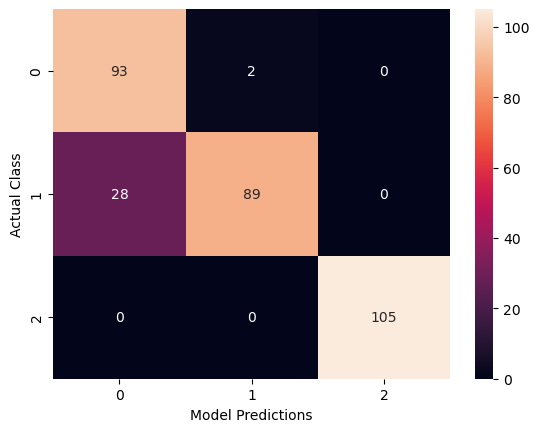

In [ ]:
creport = classification_report(Ytest, predictions)
matrix  = confusion_matrix(Ytest, predictions)
print(f'Classification Report\n {creport}')
sns.heatmap(matrix, annot=True, fmt= "g") #fmt = value format, annot = show value, cmap = style
plt.ylabel("Actual Class")
plt.xlabel("Model Predictions")
plt.show()

In [ ]:
# Train and test accuracy comparison
print(f"Training Accuracy: {model.score(Xtrain_scaled, Ytrain)}")
print(f"Test Accuracy: {model.score(Xtest_scaled, Ytest)}")

Training Accuracy: 0.8918705603788477
Test Accuracy: 0.9053627760252366


The logistic regression model is working so well as evaluated by the precision, recall and f1-score evaluation metrics

### Testing out other models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize and train the models
classifiers = [[LogisticRegression(random_state = 42, class_weight = "balanced"), 'LogisticRegression'],
               [SGDClassifier(random_state = 42, class_weight = "balanced"), 'SGD Classifiers'],
              [DecisionTreeClassifier(random_state = 42, class_weight = "balanced"), 'Decision Tree'],
              [RandomForestClassifier(random_state = 42, class_weight = "balanced"), 'Random Forest']]

<------LogisticRegression------>
Training Accuracy: 0.8863456985003947
Test Accuracy: 0.9053627760252366
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.98      0.86        95
           1       0.98      0.76      0.86       117
           2       1.00      1.00      1.00       105

    accuracy                           0.91       317
   macro avg       0.92      0.91      0.91       317
weighted avg       0.92      0.91      0.91       317



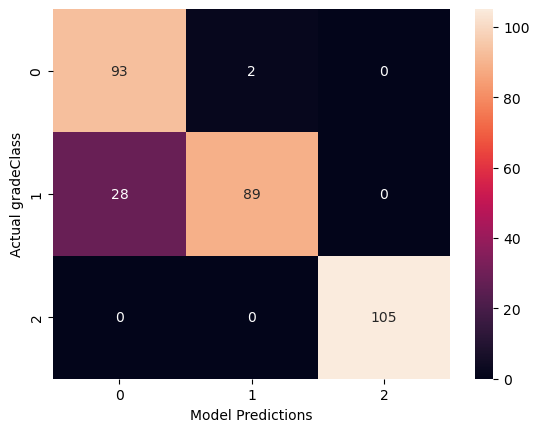

<------SGD Classifiers------>
Training Accuracy: 0.8855564325177585
Test Accuracy: 0.8958990536277602
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        95
           1       0.96      0.75      0.84       117
           2       0.99      1.00      1.00       105

    accuracy                           0.90       317
   macro avg       0.90      0.90      0.90       317
weighted avg       0.91      0.90      0.90       317



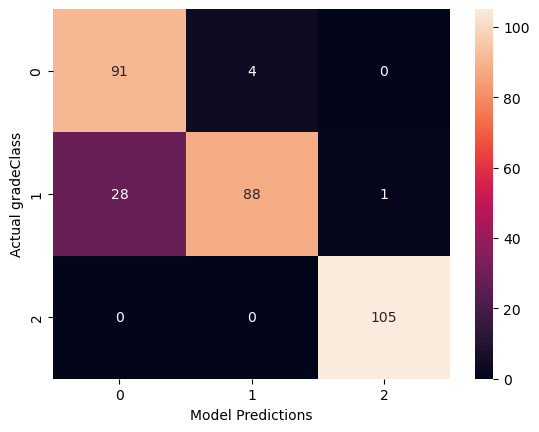

<------Decision Tree------>
Training Accuracy: 0.9779005524861878
Test Accuracy: 0.9589905362776026
Classification Report
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        95
           1       1.00      0.89      0.94       117
           2       1.00      1.00      1.00       105

    accuracy                           0.96       317
   macro avg       0.96      0.96      0.96       317
weighted avg       0.96      0.96      0.96       317



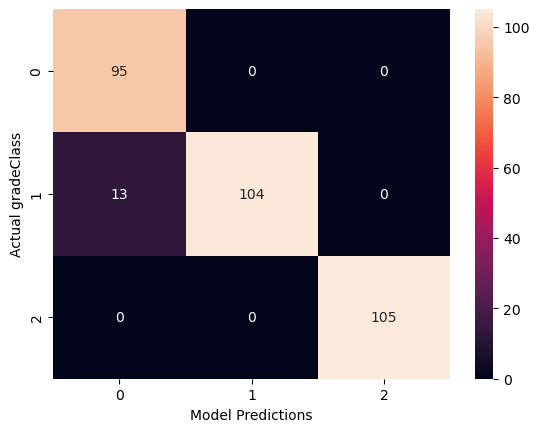

<------Random Forest------>
Training Accuracy: 0.9779005524861878
Test Accuracy: 0.9652996845425867
Classification Report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        95
           1       1.00      0.91      0.95       117
           2       1.00      1.00      1.00       105

    accuracy                           0.97       317
   macro avg       0.97      0.97      0.97       317
weighted avg       0.97      0.97      0.97       317



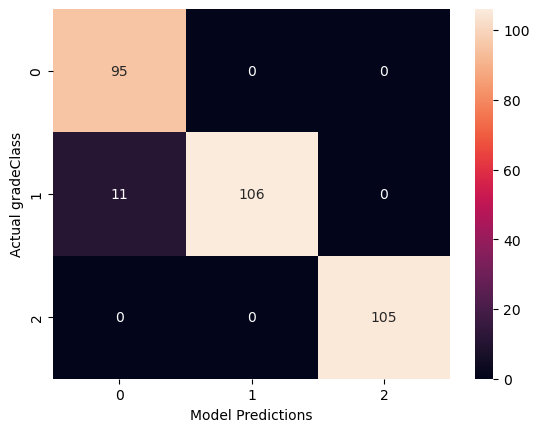

In [ ]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<------{model_name}------>")
    model.fit (Xtrain_scaled, Ytrain)
    predictions = model.predict(Xtest_scaled)
    # Train and test accuracy comparison
    print(f"Training Accuracy: {model.score(Xtrain_scaled, Ytrain)}")
    print(f"Test Accuracy: {model.score(Xtest_scaled, Ytest)}")
    creport = classification_report(Ytest, predictions)
    matrix  = confusion_matrix(Ytest, predictions)
    print(f'Classification Report\n {creport}')
    sns.heatmap(matrix, annot=True, fmt= "g")
    plt.ylabel("Actual gradeClass")
    plt.xlabel("Model Predictions")
    plt.show()

In [ ]:
classifiers

[[LogisticRegression(class_weight='balanced', random_state=42),
  'LogisticRegression'],
 [SGDClassifier(class_weight='balanced', random_state=42), 'SGD Classifiers'],
 [DecisionTreeClassifier(class_weight='balanced', random_state=42),
  'Decision Tree'],
 [RandomForestClassifier(class_weight='balanced', random_state=42),
  'Random Forest']]

**The best-performing model, from the metric evaluation, is the RandomForestClassifier. To enhance its performance, GridSearchCV will be used to fine-tune its hyperparameters, ensuring optimal results.**

In [ ]:
classifiers[3][0]

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
Xtrain.head()

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start
552,1,1,5,0,3,0.00,0,15
1247,1,1,5,0,1,0.25,2,19
1213,0,1,5,0,2,0.20,2,19
1047,1,0,5,1,1,0.00,2,19
277,1,0,4,0,1,0.00,1,19


## Hyper-Parameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter_grid = {
    "max_depth": [None, 20, 30, 50],
    'min_samples_split': [5, 7, 10, 15],
    "class_weight": [None, "balanced"],
    'max_features': ["sqrt", "log2"]
}

In [ ]:
#Initiate gridsearchcv
grid_search = GridSearchCV(estimator =classifiers[3][0], param_grid = parameter_grid, cv= 5, scoring = "accuracy")

In [ ]:
grid_search.fit(Xtrain_scaled, Ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 20, 30, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [5, 7, 10, 15]},
             scoring='accuracy')

In [ ]:
print(f'Best Parameters : {grid_search.best_params_}')
print(f'Best Score : {grid_search.best_score_}')

Best Parameters : {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5}
Best Score : 0.9676418412125362


In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_split=5, random_state=42)

Training Accuracy: 0.9779005524861878
Test Accuracy: 0.9652996845425867
Classification Report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        95
           1       1.00      0.91      0.95       117
           2       1.00      1.00      1.00       105

    accuracy                           0.97       317
   macro avg       0.97      0.97      0.97       317
weighted avg       0.97      0.97      0.97       317



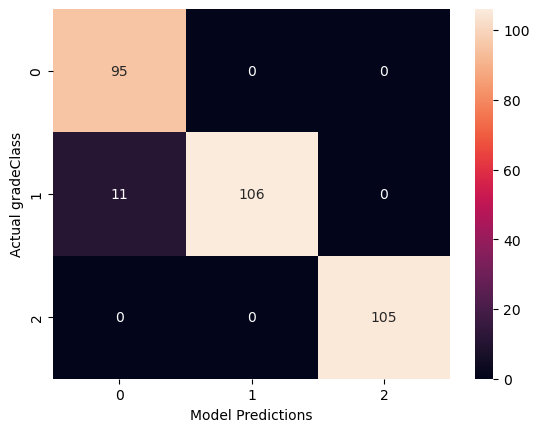

In [ ]:
predictions = best_model.predict(Xtest_scaled)
print(f"Training Accuracy: {model.score(Xtrain_scaled, Ytrain)}")
print(f"Test Accuracy: {model.score(Xtest_scaled, Ytest)}")
creport = classification_report(Ytest, predictions)
matrix  = confusion_matrix(Ytest, predictions)
print(f'Classification Report\n {creport}')
sns.heatmap(matrix, annot=True, fmt= "g")
plt.ylabel("Actual gradeClass")
plt.xlabel("Model Predictions")
plt.show()

After hyperparameter tuning
for class 0, Negative sentiment = the model classifies it correctly 95 times and misclassifies it 11 times
for class 1, Neutral sentiment = the model classifies it correctly 106 times and doesn't misclassify
for class 2, Positive sentiment = the model classifies it correctly 105 times and misclassifies it 11 times

Training Accuracy: 0.9779005524861878
Test Accuracy: 0.9652996845425867
This shows the model is performing well(no overfitting)

Precision, Recall, F1-Score: All metrics are high (around 97%), indicating a balanced model. The model can be further improved, especially in reducing misclassifications for the negative and positive sentiment classes.

# Lead Conversion Scoring

In [ ]:
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=Xtest.columns)

In [ ]:
# Convert column names to strings to ensure uniformity
Xtest_scaled.columns = Xtest_scaled.columns.astype(str)

# Get the predicted probabilities for all classes
probs = best_model.predict_proba(Xtest_scaled.values)

lead_scores = probs[:, 2]

In [ ]:
# Add the lead scores to the dataset (scale to 0-100)
Xtest_scaled["Lead_Score"] = lead_scores * 100

# Rank leads based on their lead score (higher scores = higher likelihood to convert)
Xtest_scaled["Rank"] = Xtest_scaled["Lead_Score"].rank(ascending=False)

# Sort leads by their rank
ranked_leads = Xtest_scaled.sort_values(by="Lead_Score", ascending=False)

# Display the top leads
print(ranked_leads.head())


      Program    Gender  Location  Lead Source  Lead Manager  comment Score  \
158 -0.215862 -1.400934  0.369776    -0.621092     -1.545210       0.319439   
80   1.633549  0.713809 -1.633966    -0.621092      0.239240       0.688048   
152 -0.215862  0.713809  0.369776     1.526757     -0.652985       1.302398   
154 -0.215862  0.713809  0.369776     2.242707      1.131466       0.483265   
155 -0.215862  0.713809 -1.633966    -0.621092     -0.652985       1.302398   

      Cluster  Time_to_Start  Lead_Score  Rank  
158  0.646412      -0.440429       100.0  53.0  
80   0.646412      -0.440429       100.0  53.0  
152  0.646412      -0.440429       100.0  53.0  
154  0.646412      -0.629995       100.0  53.0  
155  0.646412      -0.440429       100.0  53.0  


In [ ]:
Xtest_scaled['conversion_category'] = np.where(Xtest_scaled['Lead_Score'] >= 80, 'High',
                                  np.where(Xtest_scaled['Lead_Score'] >= 40, 'Medium', 'Low'))

In [ ]:
Xtest_scaled.head()

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start,Lead_Score,Rank,conversion_category
0,-0.215862,0.713809,0.369776,-0.621092,1.131466,-0.335868,0.646412,-0.629995,0.0,213.0,Low
1,-0.215862,0.713809,-1.633966,-0.621092,-1.545210,-0.335868,-1.750226,-0.440429,0.0,213.0,Low
2,-0.215862,0.713809,0.369776,-0.621092,-0.652985,1.711964,0.646412,-0.440429,100.0,53.0,High
3,-0.215862,0.713809,0.369776,-0.621092,0.239240,-0.335868,-1.750226,-0.772170,0.0,213.0,Low
4,1.633549,-1.400934,0.369776,0.094858,1.131466,-0.335868,-1.750226,0.365230,0.0,213.0,Low


In [ ]:
Xtest_scaled = Xtest_scaled.sort_values(by="Lead_Score", ascending=False)
Xtest_scaled

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start,Lead_Score,Rank,conversion_category
158,-0.215862,-1.400934,0.369776,-0.621092,-1.545210,0.319439,0.646412,-0.440429,100.0,53.0,High
80,1.633549,0.713809,-1.633966,-0.621092,0.239240,0.688048,0.646412,-0.440429,100.0,53.0,High
152,-0.215862,0.713809,0.369776,1.526757,-0.652985,1.302398,0.646412,-0.440429,100.0,53.0,High
154,-0.215862,0.713809,0.369776,2.242707,1.131466,0.483265,0.646412,-0.629995,100.0,53.0,High
155,-0.215862,0.713809,-1.633966,-0.621092,-0.652985,1.302398,0.646412,-0.440429,100.0,53.0,High
...,...,...,...,...,...,...,...,...,...,...,...
51,-0.215862,0.713809,-1.633966,-0.621092,0.239240,-0.335868,-1.750226,0.886538,0.0,213.0,Low
168,-0.215862,-1.400934,0.369776,1.526757,0.239240,-0.335868,0.646412,-0.772170,0.0,213.0,Low
50,-0.215862,0.713809,0.369776,1.526757,1.131466,-1.974133,0.646412,1.028713,0.0,213.0,Low
49,-0.215862,0.713809,-1.633966,-0.621092,0.239240,-0.335868,-1.750226,0.839146,0.0,213.0,Low


### Using SHAP (SHapley Additive exPlanations) to explain key factors driving predictions.

In [ ]:
Xtest_scaled = Xtest_scaled.drop(["Lead_Score", "Rank", "conversion_category"], axis = 1)

In [ ]:
import shap
explainer = shap.Explainer(best_model, Xtest_scaled)

In [ ]:
# Calculate SHAP values for the test set
shap_values = explainer(Xtest_scaled)

In [ ]:
print("SHAP values shape:", shap_values.shape)
print("Dataset shape:", Xtest_scaled.shape)

SHAP values shape: (317, 8, 3)
Dataset shape: (317, 8)


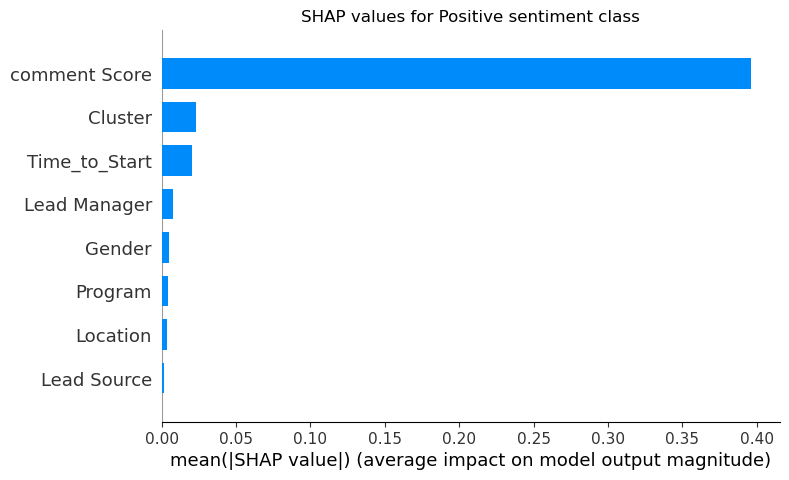

In [ ]:
shap_values_class = shap_values[:, :, 2]
shap.summary_plot(shap_values_class, Xtest_scaled, plot_type='bar',show=False)
plt.title(f'SHAP values for Positive sentiment class')
plt.show()

## Lead score for all leads

In [ ]:
Features

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start
0,2,1,4,0,2,0.000,2,54
1,2,1,5,0,2,0.250,2,19
2,2,1,5,0,2,0.000,2,19
3,2,1,3,0,2,0.125,2,19
4,2,1,4,0,2,0.000,2,19
...,...,...,...,...,...,...,...,...
683,1,1,5,4,3,0.000,0,41
684,1,0,5,1,3,0.000,0,41
685,1,1,5,0,3,0.000,0,146
686,1,0,5,0,3,0.000,0,113


In [ ]:
FeatureScaled = scaler.fit_transform(Features)
Feature_scaled = pd.DataFrame(FeatureScaled, columns=Features.columns)

In [ ]:
# Convert column names to strings to ensure uniformity
Feature_scaled.columns = Feature_scaled.columns.astype(str)

# Get the predicted probabilities for all classes
probs = best_model.predict_proba(Feature_scaled.values)

# Calculate lead scores based on the highest probability for each sample
lead_scores = probs[:, 2]
# Add the lead scores to the dataset (scale to 0-100)
Feature_scaled["Lead_Score"] = lead_scores * 100

# Rank leads based on their lead score (higher scores = higher likelihood to convert)
Feature_scaled["Rank"] = Feature_scaled["Lead_Score"].rank(ascending=False)

Feature_scaled = Feature_scaled.sort_values(by = "Lead_Score", ascending = False)

In [ ]:
Feature_scaled['conversion_category'] = np.where(Feature_scaled['Lead_Score'] >= 80, 'High',
                                  np.where(Feature_scaled['Lead_Score'] >= 40, 'Medium', 'Low'))

In [ ]:
Feature_scaled.sample(10)

,Program,Gender,Location,Lead Source,Lead Manager,comment Score,Cluster,Time_to_Start,Lead_Score,Rank,conversion_category
337,-0.131551,0.776965,-1.774744,-0.676073,-1.896518,-0.104408,1.291814,-0.429616,0.0,372.5,Low
58,1.508813,0.776965,-1.774744,-0.676073,0.792049,-0.104408,-0.873614,0.629522,0.0,372.5,Low
555,-0.131551,0.776965,0.353556,0.042328,0.792049,-0.104408,-0.873614,-1.522919,0.0,372.5,Low
171,-1.771916,-1.287059,0.353556,-0.676073,-1.896518,-0.104408,1.291814,-0.668776,0.0,372.5,Low
46,1.508813,0.776965,-1.774744,1.479130,-1.896518,-0.104408,0.209100,-0.668776,0.0,372.5,Low
235,-0.131551,0.776965,-0.710594,-0.676073,-1.000329,-0.104408,1.291814,-0.429616,0.0,372.5,Low
487,-0.131551,-1.287059,0.353556,0.042328,0.792049,-0.104408,1.291814,-0.566279,0.0,372.5,Low
516,-0.131551,0.776965,0.353556,-0.676073,0.792049,-0.104408,-0.873614,-0.805439,0.0,372.5,Low
164,-1.771916,-1.287059,0.353556,-0.676073,-1.896518,-0.104408,1.291814,-0.668776,0.0,372.5,Low
408,-0.131551,0.776965,-1.774744,-0.676073,-0.104140,-0.104408,-0.873614,-0.668776,0.0,372.5,Low


<Axes: xlabel='conversion_category', ylabel='count'>

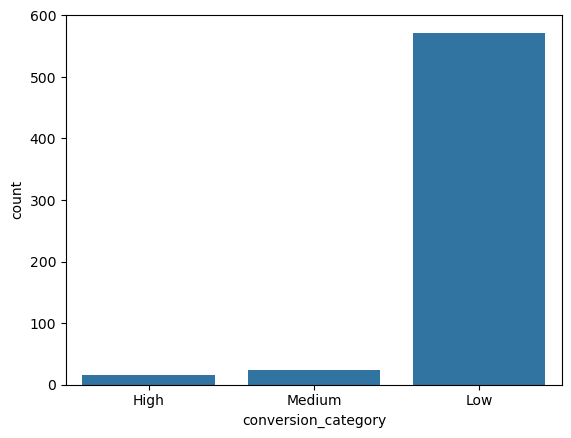

In [ ]:
sns.countplot(x= Feature_scaled["conversion_category"])

In [ ]:
data2 = data2.dropna(subset=["Email Address"])
data2.shape

(687, 12)

In [ ]:
merged_df = pd.merge(data2, Feature_scaled["conversion_category"], left_index=True, right_index=True, how='inner')
# Merge comments and feedback into a single feature
merged_df['merged_text'] = merged_df['Comments'] + ' ' + merged_df['Feedback']
merged_df.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback,conversion_category,merged_text
0,Data Science,14/07/2024 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,09/07/2024,Danjuma,Send WA message,Not Provided,Low,Send WA message Not Provided
1,Data Science,14/07/2024 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,08/03/2024,Danjuma,Interested in the da path,Follow Up,Medium,Interested in the da path Follow Up
2,Data Science,14/07/2024 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay,Low,Can't afford the price Can't Pay
3,Data Science,14/07/2024 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,08/03/2024,Danjuma,"Should check back before the end of today, int...",Follow Up,High,"Should check back before the end of today, int..."
4,Data Science,14/07/2024 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,08/03/2024,Danjuma,"Checking the brochure and registration link, t...",Follow Up,Low,"Checking the brochure and registration link, t..."


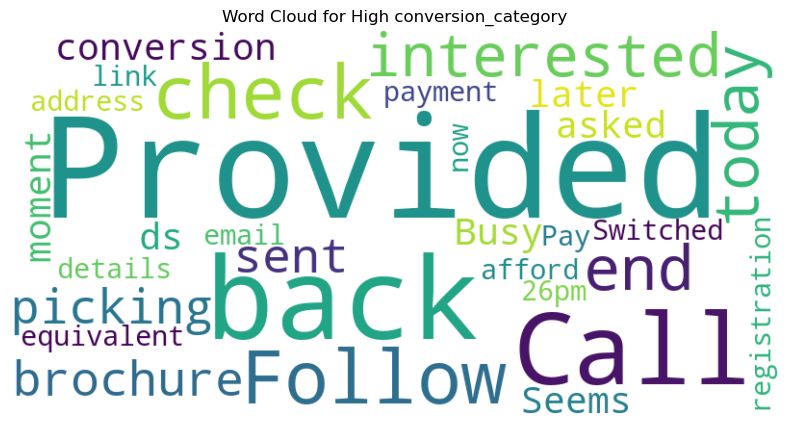

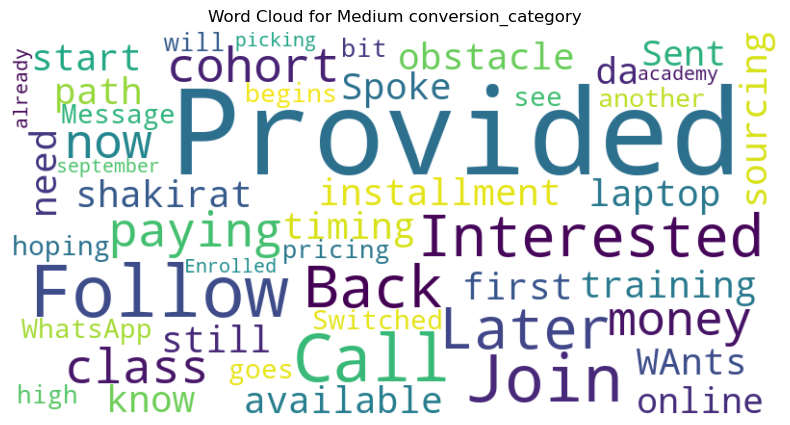

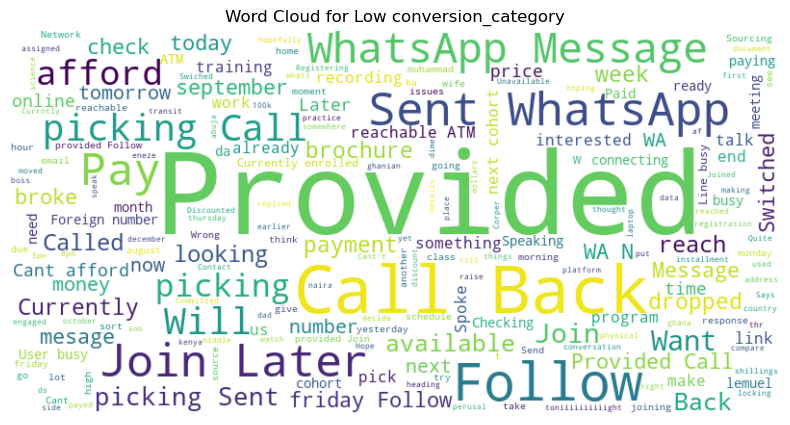

In [ ]:
# Generate word clouds for each sentiment category
def generate_word_cloud(sentiment):
    text = " ".join(merged_df[merged_df['conversion_category'] == sentiment]['merged_text'].fillna("").astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} conversion_category')
    plt.show()

# Generate word clouds for Positive, Neutral, and Negative
for sentiment in ['High', 'Medium', 'Low']:
    generate_word_cloud(sentiment)

### Observations

High Lead Scores: These leads have the highest conversion probability. <br>
Recommendation: Focus on personalized, high-touch engagement like calls or tailored emails. Allocate more resources to nurturing these leads.

Low Lead Scores: These leads have a low conversion probability.<br>
Recommendation: Use automated strategies (e.g., email drip campaigns, retargeting ads) and allocate minimal resources unless their engagement changes.

Medium Lead Scores: These leads have moderate conversion potential.<br>
Recommendation: Employ a balanced approach, combining automated strategies with monitoring for increased interest to potentially upgrade them to high-priority leads.

Overall Strategy: Allocate resources based on conversion probability, prioritizing high-scoring leads, automating low-scoring ones, and balancing efforts for medium-scoring leads.

##Prescriptive Recommendations


1.**Optimize Lead Manager Performance**

Performance Monitoring: Implement a performance tracking system that records follow-up actions by lead managers (e.g., number of calls/emails sent, response times, conversion outcomes).

Use your model predictions to evaluate each lead manager’s effectiveness, highlighting outliers (both positive and negative).

Accountability Measures: Introduce CRM (Customer Relationship Management) tools such as Salesforce, HubSpot, Zoho CRM, and Microsoft Dynamics 365 that log all interactions between lead managers and leads, ensuring transparency and reducing potential dishonesty.

Training and Feedback: Provide tailored training for underperforming lead managers. Use best practices from top performers to create standardized follow-up protocols.

2. **Improve Follow-Up Strategies**

Reduce Engagement Gaps: Automate follow-ups immediately after webinars to maintain engagement. For example, send personalized emails within 24 hours and schedule follow-up calls within three days.

Sentiment-Based Prioritization: Leads with positive comments should be prioritized for immediate follow-ups, as they are more likely to convert.

Create Multi-Channel Follow-Ups: Use a mix of channels (e.g., email, WhatsApp, LinkedIn) based on lead preferences. For example, leads sourced from LinkedIn may prefer follow-ups on the same platform.

3. **Target High-Converting Segments**

Analyze Lead Sources: Focus marketing efforts on lead sources with historically high conversion rates. For example, from the dataset Facebook leads convert better. The following can be done to improve and maintain it:

i. Expand Ad Budget: Allocate a larger share of the marketing budget to Facebook campaigns, especially for high-performing ad formats like lead forms, video ads, or carousel ads.

ii. Experiment with Ad Types: Test various creatives, including testimonials, program overviews, or webinar highlights, to see what resonates best with your audience.

iii. Leverage Facebook Groups and Communities by
a. Create or Join Niche Groups: Establish a Facebook group for data enthusiasts or professionals (e.g., "Future Data Scientists Network") to foster community engagement and promote your programs subtly.
Participate in relevant groups by sharing valuable insights, responding to questions, and promoting webinars.

b. Host Live Events: Run Facebook Live sessions featuring program alumni, instructors, or career experts to attract and engage potential leads directly on the platform.

iv. Encourage Referrals from Facebook Leads by
a. Referral Incentives: Encourage Facebook leads to refer friends by offering discounts, free webinars, or other incentives.

b. Leverage Social Proof: Share testimonials, certificates, or success stories of participants who came through Facebook to build trust and attract similar leads.

v. Use Facebook Messenger for Direct Engagement by
Automated Messenger Bots: To use Facebook Messenger bots for direct engagement, select a chatbot platform like ManyChat or Chatfuel, link it to your Facebook page, and design workflows to answer FAQs, share webinar schedules, and guide users through registration.

vi. Build Long-Term Engagement by
a. Content Strategy: Regularly post engaging content like tips, tutorials, participant spotlights, and industry insights to keep your audience interested.

b. Retarget Webinar Attendees: To retarget webinar attendees, install Facebook Pixel on key pages, create a custom audience of non-converters, and design ads highlighting program benefits or deadlines. Launch and monitor the campaign to re-engage attendees effectively.


4.** Geographic Customization:**
a. Localized Messaging and Ads: Customize the language, tone, and messaging of campaigns based on the region. For example, create region-specific ads that emphasize local career opportunities and the relevance of the program to that market. Offer regional case studies to enhance program relevance, HOW?

In reference to the result from our datasets we see Nigeria achieving the most(521), South Africa (2), United Kindgom (2)

i. Local Career Opportunities: In Nigeria, there’s increasing demand for data professionals in sectors like fintech, telecommunications, and agriculture. Major Nigerian companies such as Flutterwave, Interswitch, and MTN are looking for skilled data scientists to enhance their operations.

Example Message:
"The Nigerian fintech industry is booming, with companies like Flutterwave and Interswitch actively hiring data scientists to drive innovation. Our Data Science program provides the skills you need to take advantage of the growing opportunities in fintech and telecoms in Nigeria."

Relevance of the Program: The program can highlight skills such as predictive analytics, big data processing, and Python, which are highly valued in the Nigerian tech ecosystem.

Example Message:
"Learn essential skills like Python, machine learning, and data visualization that are crucial for roles in leading Nigerian companies like MTN and Interswitch, which are driving digital transformation in the telecom and financial sectors."

ii. South Africa (Data Science Program)
Local Career Opportunities: In South Africa, industries such as financial services, retail, and agriculture are increasingly relying on data science. Companies like Standard Bank, Naspers, and Woolworths are looking for professionals who can leverage data to improve business processes.

Example Message:
"South Africa's financial sector is growing, with companies like Standard Bank and Naspers seeking talented data scientists. Our Data Science program equips you with the skills needed to thrive in the fast-evolving industries of banking, retail, and e-commerce in South Africa."

Relevance of the Program: Emphasize the skills taught, such as data analysis, machine learning, and predictive modeling, which are directly applicable to industries like finance and retail in South Africa.

Example Message:
"Gain hands-on experience with data analysis and machine learning tools that are essential for top South African companies like Woolworths and Standard Bank, which are harnessing data to enhance customer experiences and streamline operations."

iii. United Kingdom (Data Science Program)
Local Career Opportunities: In the UK, industries like healthcare, finance, and technology are major employers of data science professionals. Leading organizations such as the NHS, Barclays, and tech startups in London are actively recruiting data scientists to harness the power of data.

Example Message:
"The UK's healthcare and financial sectors are increasingly adopting data-driven approaches, with companies like the NHS and Barclays looking for skilled data scientists. Our Data Science program will help you gain the expertise needed to seize these opportunities in the UK."

Relevance of the Program: The program should focus on in-demand skills like machine learning, data ethics, and AI, which are becoming more important in sectors like healthcare (NHS) and finance (Barclays) in the UK.

Example Message:
"Our Data Science program covers AI, machine learning, and ethical data practices, empowering you to excel in the UK's booming healthcare and financial sectors, with major employers like the NHS and Barclays seeking data professionals to drive innovation and improve services."


5.**Gender Inclusivity**: Address potential barriers for underrepresented genders in specific programs as we see in the plot of gender distribution explaining that males are more interested in tech than females. For instance, create women-focused campaigns to promote tech-related courses. I have seen this has been employed as the mission of empowering 4000 women in tech has started.

6.** Align Offerings with Interests**
Program-Specific Insights: The course Data Analysis has the highest number of applications and so it should looked into to identify what drives its popularity? Allocate more resources to promoting this course while investigating barriers or gaps that may be limiting interest or conversions for other programs like Data Science and Business Analysis."

Webinar Content Optimization:
Use attendee feedback and sentiment analysis to refine webinar content. Focus on topics that resonate with leads and emphasize program value propositions.

7. Leverage Predictive Scoring
Lead Prioritization: Use your model to score leads based on their likelihood to convert and create a tiered follow-up strategy:
High-likelihood leads: Immediate and intensive engagement.
Medium-likelihood leads: Regular follow-ups with nurturing content.
Low-likelihood leads: Automated emails with optional human follow-ups.

Churn Prediction: Predict and address potential drop-offs in leads that engage but fail to convert. Offer tailored incentives like discounts or flexible payment plans.

8. Feedback Loop for Continuous Improvement  by

a. Performance Metrics: Regularly track metrics like conversion rate, time-to-convert, and engagement rates per lead manager, lead source, and program.

b. Iterative Model Updates: Continuously refine the predictive model with new data to improve accuracy.

c. A/B Testing: Experiment with follow-up strategies (e.g., email tone, frequency, timing) and measure their impact on conversion rates.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Limitations  

1. Data Quality Issues  
- There was **no direct conversion column**, so we had to rely on **sentiment analysis** to approximate lead interest.  
- The **comments were muddled up**, making it difficult to extract meaningful insights.  
- Some leads **selected the wrong date**, adding inconsistencies to the dataset.  

2. Imbalanced Data  
- There were **far more neutral comments** than positive or negative ones, making it difficult to gauge actual interest levels.  

3. Feature Limitations  
- The dataset lacked **strong behavioral indicators**, making it harder to distinguish leads who showed genuine intent from those who engaged passively.  

4. Changing Business Strategies & Market Conditions  
- If business strategies or market conditions change, the model might **fail to generalize** effectively.  
- **Solution:** Regular validation, cross-validation, and monitoring model performance over time.  
